In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [3]:
df = pd.read_csv('After_feature_engg.csv')

In [4]:
x = df.drop('Loan_Status',axis=1)
y = df['Loan_Status']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
df.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_log,Total_Income_log,Property_Area_Semiurban,Property_Area_Urban,Income_category_Low,Income_category_Mid,Income_category_Very High,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0,360,1,1,5849.0,4.986426,8.674026,False,True,False,False,False,False,False,False
1,1,1,0,0,360,1,0,6091.0,4.852030,8.714568,False,False,False,False,True,True,False,False
2,1,1,0,1,360,1,1,3000.0,4.189655,8.006368,False,True,False,True,False,False,False,False
3,1,1,1,0,360,1,1,4941.0,4.787492,8.505323,False,True,False,False,False,False,False,False
4,1,0,0,0,360,1,1,6000.0,4.948760,8.699515,False,True,False,False,True,False,False,False


In [6]:
lr_model = LogisticRegression(max_iter=4000)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)


In [7]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)


In [8]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
rf_pred = rf_model.predict(x_test)


In [9]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test, lr_pred, "Logistic Regression")
evaluate_model(y_test, dt_pred, "Decision Tree")
evaluate_model(y_test, rf_pred, "Random Forest")



📊 Logistic Regression Performance:
Confusion Matrix:
 [[19 24]
 [ 3 77]]
Accuracy: 0.7804878048780488
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123


📊 Decision Tree Performance:
Confusion Matrix:
 [[24 19]
 [21 59]]
Accuracy: 0.6747967479674797
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55        43
           1       0.76      0.74      0.75        80

    accuracy                           0.67       123
   macro avg       0.64      0.65      0.65       123
weighted avg       0.68      0.67      0.68       123


📊 Random Forest Performance:
Confusion Matrix:
 [[21 22]
 [ 4 76]]
Accuracy: 0.7886178861788617
C


🔍 Evaluation Report for Logistic Regression
Accuracy: 0.7804878048780488

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.44      0.58        43
           1       0.76      0.96      0.85        80

    accuracy                           0.78       123
   macro avg       0.81      0.70      0.72       123
weighted avg       0.80      0.78      0.76       123



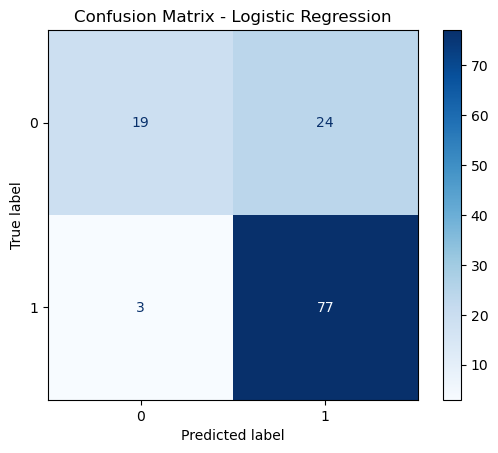


🔍 Evaluation Report for Decision Tree
Accuracy: 0.6747967479674797

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.56      0.55        43
           1       0.76      0.74      0.75        80

    accuracy                           0.67       123
   macro avg       0.64      0.65      0.65       123
weighted avg       0.68      0.67      0.68       123



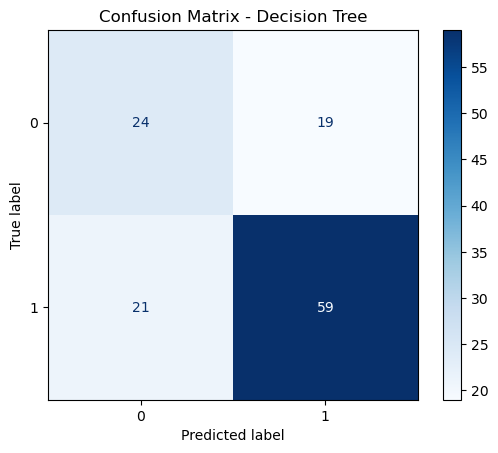


🔍 Evaluation Report for Random Forest
Accuracy: 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.49      0.62        43
           1       0.78      0.95      0.85        80

    accuracy                           0.79       123
   macro avg       0.81      0.72      0.74       123
weighted avg       0.80      0.79      0.77       123



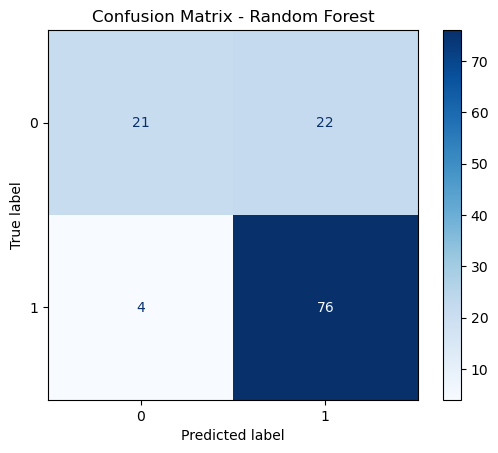

In [10]:

# Function to evaluate and plot confusion matrix
def evaluate_and_plot(y_true, y_pred, model_name):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    print(f"\n🔍 Evaluation Report for {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))
    
    # Plot Confusion Matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Call for each model
evaluate_and_plot(y_test, lr_pred, "Logistic Regression")
evaluate_and_plot(y_test, dt_pred, "Decision Tree")
evaluate_and_plot(y_test, rf_pred, "Random Forest")

In [12]:
# Save the feature column names
import joblib
joblib.dump(list(x.columns), 'feature_columns.pkl')
joblib.dump(rf_model, 'loan_approval_rf_model.pkl')


['loan_approval_rf_model.pkl']

In [ ]:
!streamlit run app.py

In [ ]:
!streamlit run app2.py